# 티니핑 이미지 분류 모델
- 데이터 수집 
    - 구글링을 통한 이미지 수집 -> 배경 제거 전처리 
    - 데이터 부족으로 인해 이미지 반전, 회전, 블러처리 등을 통해 증폭시킴

In [1]:
import os, glob
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## 데이터 로딩

In [2]:
filepath = 'images/layout_rawdata__augment_5/'
folderList = glob.glob(filepath + '*')

imgNP = []
label = []

for folder in folderList:
    imagList = glob.glob(folder + '/*')
    label.extend([folder.split('\\')[-1]] * len(imagList))
    for img in imagList:
        imgData = cv2.imread(img, cv2.IMREAD_GRAYSCALE).reshape(-1)
        imgNP.append(imgData)

imgNP = np.array(imgNP)
label = np.array(label)

imgNP.shape, label.shape

((29498, 40000), (29498,))

In [3]:
# 스케일링
feature = imgNP / 255.0
feature.shape

(29498, 40000)

## 데이터 준비

In [4]:
## train / test
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(feature, label, 
                                                    stratify=label, test_size=0.2, random_state=6)

## 모델링 - RandomForestClassifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(train_X, train_y)

RandomForestClassifier()

In [6]:
rf_model.score(train_X, train_y)

1.0

In [7]:
rf_model.score(test_X, test_y)

1.0

## 모델 저장

In [8]:
# 경로 설정
import joblib
model_dir='./model/'
model_file=model_dir + 'ping_model_5.pkl'

# 경로 확인
os.path.exists(model_dir)

True

In [9]:
# 모델 저장
joblib.dump(rf_model, model_file)

['./model/ping_model_5.pkl']

## 분류 예측

In [16]:
def pingping(test_file=None, d_size=(200,200)):

    # 모델 불러오기
    import cv2
    from joblib import load
    import matplotlib.pyplot as plt
    
    # 모델 파일 관련 변수
    model_dir='./model/'
    model_file=model_dir + 'ping_model_5.pkl'

    # 모델 로딩
    ping_model = load(model_file)

    # 사이즈를 동일하게 조정 후 이미지 데이터 읽기
    org = cv2.imread(test_file)
    test_img = cv2.resize(org, d_size)

    # 이미지 배경 지우기
    # from rembg import remove
    # test_img = remove(test_img)

    # 그레이스케일
    test_img=cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    plt.imshow(test_img)
    
    # shape 맞추기
    test_img=test_img.reshape(-1)

    # 데이터 프레임에 넣기
    import pandas as pd
    test_img_df=pd.DataFrame(test_img)
    test_img_df=test_img_df.T

    # 스케일링 
    test_img=test_img_df/255

    # 예측
    result=ping_model.predict(test_img)
    class_=ping_model.classes_
    proba_=ping_model.predict_proba(test_img)

    print(f'이 핑핑이는 [ {result[0]}ping ] 입니다 :D')
    # for a in range(len(class_)):
    #     print(f'{class_[a]:^7} : {proba_[0][a]:.2f}')

이 핑핑이는 [ ggraeping ] 입니다 :D


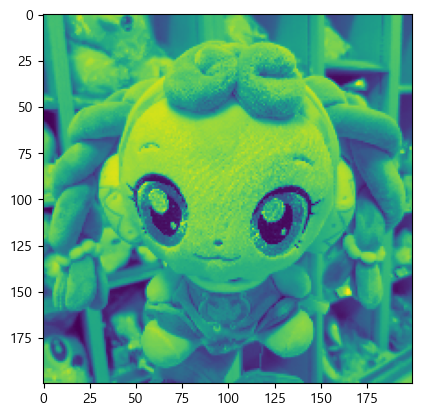

In [17]:
# 예측
test_file='./images/test/ggrae.jpg'
pingping(test_file)

이 핑핑이는 [ soljjiping ] 입니다 :D


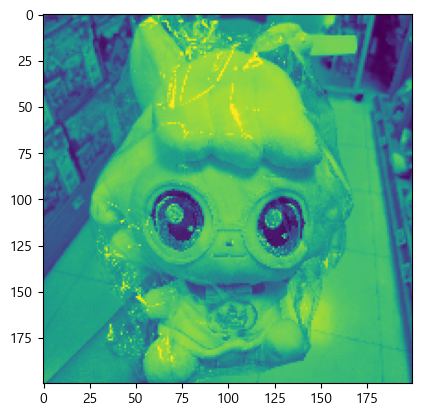

In [18]:
# 예측
test_file='./images/test/soljji.jpg'
pingping(test_file)

이 핑핑이는 [ HaChuping ] 입니다 :D


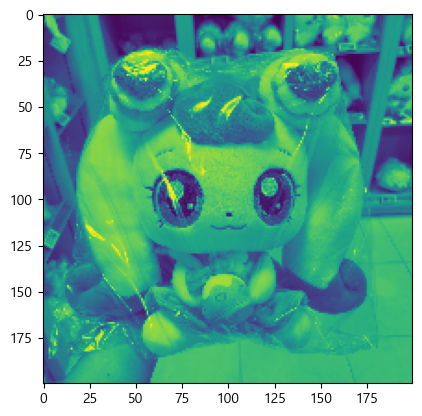

In [19]:
# 예측
test_file='./images/test/hachu.jpg'
pingping(test_file)

이 핑핑이는 [ MalLangping ] 입니다 :D


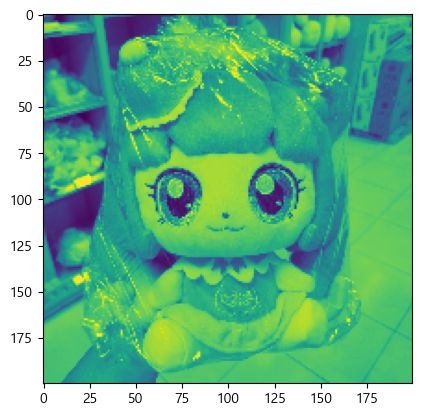

In [20]:
# 예측
test_file='./images/test/malLang.jpg'
pingping(test_file)

이 핑핑이는 [ nanaping ] 입니다 :D


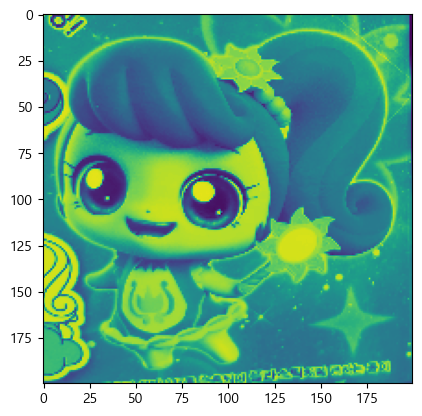

In [21]:
# 예측
test_file='./images/test/nana.jpg'
pingping(test_file)